# Preprocessing

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Step 1:
Import the boston house dataset from `sklearn.datasets`. Create train and test datasets. Check the data description and familiarize yourself with the data.

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()
from sklearn.model_selection import train_test_split
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))

In [12]:
axes.ravel()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f9819e8>,
      dtype=object)

In [ ]:
dir(axes[0][0])

### Step 2:
Create a scatter plot of each attribute with the mean house price.

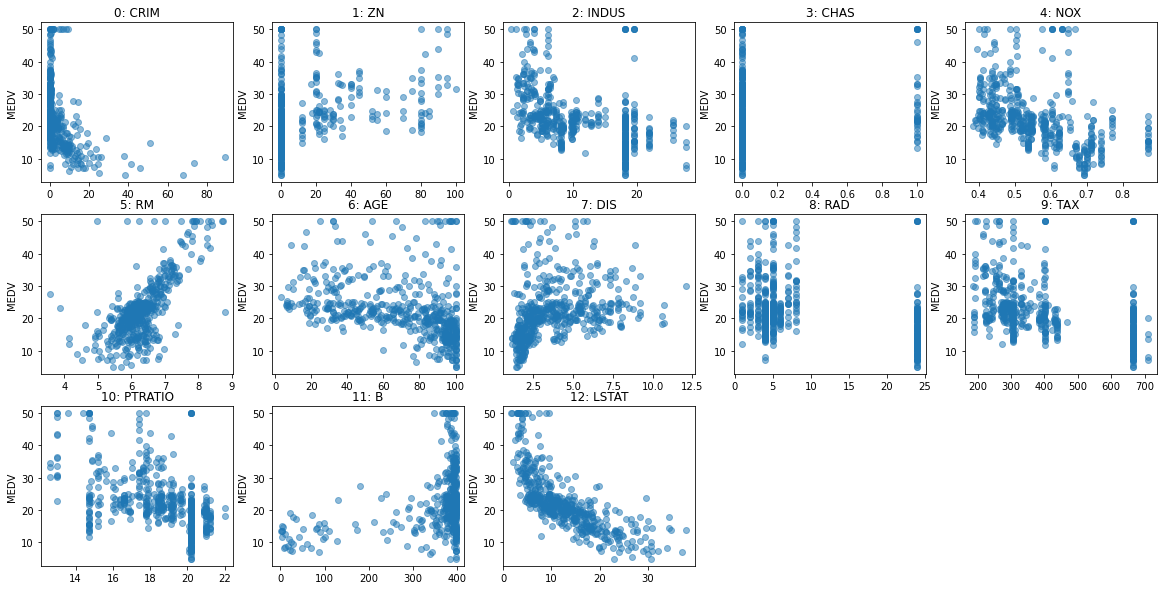

In [6]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

### Step 3:
Create a box plot of all attributes.

In [27]:
plt.boxplot(X)
plt.xticks(np.arange(1, X.shape[1] + 1),
           boston.feature_names, rotation=30, ha="right"); #horizontalalignment or ha

### Step 4:
Use `StandardScaler()` to scale the trainin data set.

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

### Step 5:
Use `KNeighborsRegressor()` to fit both not-scaled and scaled datasets. Check the scores of test dataset for both models.

In [29]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor().fit(X_train, y_train)
knr.score(X_train, y_train)

0.7066272660046313

In [30]:
knr.score(X_test, y_test)

0.4616380924610112

In [31]:
knr_scaled = KNeighborsRegressor().fit(X_train_scaled, y_train)
knr_scaled.fit(X_train_scaled, y_train)
knr_scaled.score(X_train_scaled, y_train)

0.849576948978109

In [32]:
X_test_scaled = scaler.transform(X_test)
knr_scaled.score(X_test_scaled, y_test)

0.606952770711171

### Step 6:
Repeat Step 5 for `RandomForestRegressor`.

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7952684623500126

In [34]:
rf_scaled = RandomForestRegressor(n_estimators=100, random_state=0)
rf_scaled.fit(X_train_scaled, y_train)
rf_scaled.score(X_test_scaled, y_test)

0.7953897811917161